# Data Parsing, Cleansing and Integration
## Task 1 and 2
#### Student Name: Sunita Verma


Date: 8/09/2023

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy



##**Introduction:**

In the world of job search websites, proper administration and analysis of job advertisement data is critical to improving the user experience for job seekers. Websites such as seek.com, Azuna.com, and others have sophisticated job search systems that allow users to search for relevant job ads based on a variety of criteria such as keywords, salary, and categories. The work at hand for a data analyst is to wrangle a huge collection of job advertisement records stored in XML format, handle potential data quality issues, and combine this information with another data source. The goal is to collect clean, integrated data that can be used for future analysis and improvements to the job search experience.

Assessment Overview
This assessment comprises three major tasks to be completed sequentially:

- Task 1: Data Parsing
In this initial task, the focus is on exploring the first dataset, identifying its format, and using Python tools and libraries to parse the data into a pandas DataFrame. The dataset's structure and contents will be examined to prepare it for further analysis.

- Task 2: Data Cleaning
Once the data is successfully parsed, the next step is to delve deeper into the dataset. This involves identifying and rectifying data quality issues, anomalies, or inconsistencies that may exist within the dataset. The objective is to transform the data into a clean and structured format, aligning it with the required data quality standards.

- Task 3: Data Integration
In the final task, the cleaned dataset from Task 2 is integrated with a second dataset. This integration process involves addressing schema-level conflicts, merging the datasets, and identifying and resolving any data-level conflicts that may arise during integration. The goal is to create a unified dataset that combines information from both sources, ready for comprehensive analysis.

- Challenges and Approaches
Throughout this assessment, several challenges may be encountered, including but not limited to:

Parsing data from XML format and converting it into a usable DataFrame.
Identifying and addressing data quality issues such as missing values, duplicates, and inconsistencies.
Integrating data from two different sources with potentially conflicting schemas.
Resolving data-level conflicts, such as differing representations of the same entity.
To overcome these challenges, various Python libraries, data cleaning techniques, and data integration strategies will be employed. The assessment will provide a comprehensive demonstration of the steps taken to handle these challenges and prepare the data for meaningful analysis.

In summary, this assessment simulates a real-world scenario where data analysts are tasked with extracting, cleaning, and integrating job advertisement data. The successful completion of these tasks will contribute to enhancing the overall usability and effectiveness of job hunting websites, ultimately benefiting job seekers and employers alike.

## Importing libraries

In [714]:
import re
import difflib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xml.etree.ElementTree as etree

## Task 1. Parsing Data

### 1.1. Examining and loading data
I have examined the "dataset1.xml" file to understand its content and structure. The data in the XML file is organized hierarchically, with nested elements. To load this XML data into Python, we can use libraries like 'xml.etree.ElementTree'.This library will allow us to parse the XML and convert it into a more accessible data structure,such as DataFrame, making it easier to work with and analyze.

In [715]:
tree = etree.parse("/content/dataset1.xml")

In [716]:
# Code to inspect the provided data file
root = tree.getroot()
root.tag

'Rows'

In [717]:
# Print the entire XML structure
etree.dump(root[0][0])
etree.dump(root[0][1])

<SrcName>cv-library.co.uk</SrcName>
<Ad ID="69537180">
<Title>Head of Business Assurance</Title>
<Location>UK</Location>
<Company>Interaction Finance</Company>
<ContractTime>permanent</ContractTime>
<Category>Accounting &amp; Finance Jobs</Category>
<Salary>47500</Salary>
<OpenDate>20130131T120000</OpenDate>
<CloseDate>20130302T120000</CloseDate>
</Ad>


In [718]:
# Alternatively, we can loop through elements to print specific information
for element in root[0][1]:
    print("Tag:", element.tag)
    print("Attributes:", element.attrib)
    print("Text:", element.text)
    print()

Tag: Title
Attributes: {}
Text: Head of Business Assurance

Tag: Location
Attributes: {}
Text: UK

Tag: Company
Attributes: {}
Text: Interaction Finance

Tag: ContractTime
Attributes: {}
Text: permanent

Tag: Category
Attributes: {}
Text: Accounting & Finance Jobs

Tag: Salary
Attributes: {}
Text: 47500

Tag: OpenDate
Attributes: {}
Text: 20130131T120000

Tag: CloseDate
Attributes: {}
Text: 20130302T120000



In [719]:
for child in root[0][1]:
    print(child)

<Element 'Title' at 0x7feef3125a80>
<Element 'Location' at 0x7feef3125fd0>
<Element 'Company' at 0x7feef3126200>
<Element 'ContractTime' at 0x7feef3124db0>
<Element 'Category' at 0x7feef3124fe0>
<Element 'Salary' at 0x7feef3126ac0>
<Element 'OpenDate' at 0x7feef3127420>
<Element 'CloseDate' at 0x7feef3125d00>


In [720]:
len(root[0])

7169

### 1.2 Parsing data into the required format

*Extracting XML Data into Pandas DataFrame*

So far we have loaded XML into an element tree and have also found all the tags that contain the data we want.
In this task, we are going to extract the records in XML and store them into Pandas DataFrame, as we always do :)

Below we create a data dictionary `job_data`, with keys equal to the tags name: 'Id','Title','Location','Company','ContractType','ContractTime','Category',	'Salary','OpenDate', 'CloseDate', 'SourceName', the value of each will be use to store a list of text values corresponds to those tags.

To extract data from an XML file into a DataFrame while dealing with scenarios where some tags are missing in certain rows. For the tags that aren't present in certain rows, we'll need to address missing values (e.g., by inserting None).



In [721]:
job_data = {
    'Id': [],
    'Title': [],
    'Location': [],
    'Company': [],
    'ContractType': [],
    'ContractTime': [],
    'Category': [],
    'Salary': [],
    'OpenDate': [],
    'CloseDate': [],
    'SourceName': [],
}


In [722]:
# Iterate through the XML elements and extract the data
for source in root.findall('.//Source'):
    src_name = source.find('SrcName').text
    for ad in source.findall('Ad'):
        job_data['Id'].append(ad.get('ID'))
        job_data['Title'].append(ad.find('Title').text if ad.find('Title') is not None else None)
        job_data['Location'].append(ad.find('Location').text if ad.find('Location') is not None else None)
        job_data['Company'].append(ad.find('Company').text if ad.find('Company') is not None else None)
        job_data['ContractType'].append(ad.find('ContractType').text if ad.find('ContractType') is not None else None)
        job_data['ContractTime'].append(ad.find('ContractTime').text if ad.find('ContractTime') is not None else None)
        job_data['Category'].append(ad.find('Category').text if ad.find('Category') is not None else None)
        job_data['Salary'].append(ad.find('Salary').text if ad.find('Salary') is not None else None)
        job_data['OpenDate'].append(ad.find('OpenDate').text if ad.find('OpenDate') is not None else None)
        job_data['CloseDate'].append(ad.find('CloseDate').text if ad.find('CloseDate') is not None else None)
        job_data['SourceName'].append(src_name)


print(len(job_data['Id']))
print(len(job_data['Title']))
print(len(job_data['Location']))
print(len(job_data['Company']))
print(len(job_data['ContractType']))
print(len(job_data['ContractTime']))
print(len(job_data['Category']))
print(len(job_data['Salary']))
print(len(job_data['OpenDate']))
print(len(job_data['CloseDate']))
print(len(job_data['SourceName']))

50753
50753
50753
50753
50753
50753
50753
50753
50753
50753
50753


In [723]:
# Create a Pandas DataFrame from the extracted data
df = pd.DataFrame(job_data)
df.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,69537180,Head of Business Assurance,UK,Interaction Finance,None,permanent,Accounting & Finance Jobs,47500,20130131T120000,20130302T120000,cv-library.co.uk
1,68216910,Machine Tool Wiremen / Panel Wiremen,Bradford,Network Employment Consultancy,None,permanent,Engineering Jobs,23040,20130314T150000,20130612T150000,cv-library.co.uk
2,70166734,sales (no cold calling),Stoke-On-Trent,Oakland House Recruitment,None,permanent,Sales Jobs,15500,20120527T000000,20120626T000000,cv-library.co.uk
3,70763600,Nurse Medical Advisor PART TIME,Guildford,Reed Health,part_time,None,Healthcare & Nursing Jobs,31000,20130829T120000,20130912T120000,cv-library.co.uk
4,69559871,Sales/Customer Service Engineer,UK,Grad Central,None,permanent,Engineering Jobs,19500,20120513T120000,20120811T120000,cv-library.co.uk


......

## Task 2. Auditing and cleansing the loaded data

In this task, we will perform an audit of the loaded data, identify data problems, and apply data cleansing techniques to address these issues. We will also maintain an error list to keep track of the problems found and the actions taken to fix them.

In [724]:
df.shape

(50753, 11)

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50753 entries, 0 to 50752
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            50753 non-null  object
 1   Title         50753 non-null  object
 2   Location      50753 non-null  object
 3   Company       50144 non-null  object
 4   ContractType  27219 non-null  object
 5   ContractTime  46561 non-null  object
 6   Category      50753 non-null  object
 7   Salary        50388 non-null  object
 8   OpenDate      50753 non-null  object
 9   CloseDate     50753 non-null  object
 10  SourceName    50753 non-null  object
dtypes: object(11)
memory usage: 4.3+ MB


In [726]:
df.describe()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
count,50753,50753,50753,50144,27219,46561,50753,50388,50753,50753,50753
unique,50753,50750,496,8767,5,5,8,3372,2194,2415,107
top,69537180,Executive Credit Controller,UK,,full_time,permanent,IT Jobs,35000,20130626T150000,20120508T000000,totaljobs.com
freq,1,2,7719,2685,11250,31025,13118,1736,41,39,9265


In [727]:
df.isnull().sum() #count the number of missing/null values

Id                  0
Title               0
Location            0
Company           609
ContractType    23534
ContractTime     4192
Category            0
Salary            365
OpenDate            0
CloseDate           0
SourceName          0
dtype: int64

- The 'Company' column has 609 missing values, indicating that some job listings do not specify the company name.

- The 'ContractType' column shows 23,534 missing values, suggesting that a significant portion of job listings lacks information about contract types (e.g., full-time or part-time).

- In the 'ContractTime' column, there are 4,192 missing values, indicating that some job listings do not mention the contract duration (e.g., permanent or contract).

- Additionally, there are 365 missing values in the 'Salary' column, suggesting that some job listings lack salary information.

In [728]:
## Making copy of dataframe as data_data
df_data = df.copy()
## priting copied data frame
df_data.head()


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,69537180,Head of Business Assurance,UK,Interaction Finance,None,permanent,Accounting & Finance Jobs,47500,20130131T120000,20130302T120000,cv-library.co.uk
1,68216910,Machine Tool Wiremen / Panel Wiremen,Bradford,Network Employment Consultancy,None,permanent,Engineering Jobs,23040,20130314T150000,20130612T150000,cv-library.co.uk
2,70166734,sales (no cold calling),Stoke-On-Trent,Oakland House Recruitment,None,permanent,Sales Jobs,15500,20120527T000000,20120626T000000,cv-library.co.uk
3,70763600,Nurse Medical Advisor PART TIME,Guildford,Reed Health,part_time,None,Healthcare & Nursing Jobs,31000,20130829T120000,20130912T120000,cv-library.co.uk
4,69559871,Sales/Customer Service Engineer,UK,Grad Central,None,permanent,Engineering Jobs,19500,20120513T120000,20120811T120000,cv-library.co.uk


In [729]:
df_data['Id'].value_counts()

69537180    1
69669961    1
69669222    1
70519539    1
68544641    1
           ..
72453830    1
69995088    1
72439508    1
72241288    1
66372417    1
Name: Id, Length: 50753, dtype: int64

In [730]:
df_data['Title'].value_counts()

Executive Credit Controller                         2
Mobile Crane Training Officer                       2
Business Analyst  Investment Bank/Credit/Risk/BI    2
Head of Business Assurance                          1
Regional Facilities Manager  North West England     1
                                                   ..
PQ FP&A Analyst                                     1
Dialler HelpDesk Consultant                         1
Academy Manager Birmingham                          1
Sales Negotiator Wanted – Hackney                   1
Graduate Engineer (Water industry)                  1
Name: Title, Length: 50750, dtype: int64

In [731]:
df_data['Location'].value_counts()

UK                   7719
London               6570
South East London    2665
The City             1145
Central London        829
                     ... 
HAMpshire               1
Oxfords                 1
Manchaster              1
Livepool                1
birmingham              1
Name: Location, Length: 496, dtype: int64

The output reveals that the majority of job listings are in the UK and London, while various other locations are also present. This also exposes location data inconsistencies, including typographical errors like 'Manchaster' and 'Livepool' and inconsistent capitalization such as 'HAMpshire.' These discrepancies in spelling and case indicate data quality concerns, necessitating data cleaning and standardization for accuracy.

In [732]:
df_data['Company'].value_counts()

                   2685
N/A                1227
UKStaffsearch       451
-                   414
Randstad            374
                   ... 
Millsys               1
Sojourn Hotels        1
SHARE Community       1
Longhirst Hall        1
Group Cytek           1
Name: Company, Length: 8767, dtype: int64

When we look at the information about the companies in the dataset, we notice a few important things. First, there are many job listings (2685 to be exact) where we don't know the name of the company. It's like seeing a job ad but not knowing who's offering the job. There are also 1227 listings that simply say 'N/A' for the company name, which means the same thing - we don't know the company.

On top of that, there are lots of different company names in the dataset. Some are specific, like 'UKStaffsearch,' while others are a bit strange, like just a hyphen ('-') or nothing at all. These odd entries can make it hard to understand who's hiring for these jobs.

These issues with company names might make it tricky to analyze the data properly. To make things better, we need to fix these problems. We should decide what to do with the missing company names

In [733]:
df_data['ContractType'].value_counts()

full_time    11250
              5944
-             5824
N/A           2780
part_time     1421
Name: ContractType, dtype: int64

In the data, we looked at the 'ContractType' column, which tells us what kind of contracts job listings offer. We found that most jobs, about 11,250 of them, are labeled as 'full_time,' meaning they require full-time work. However, there's a problem with nearly 5,944 job listings; they don't tell us whether they're full-time, part-time, or something else. It's like missing information. Additionally, there are entries with hyphens ('-') and 'N/A' in this column, which are also unclear and might mean missing information.

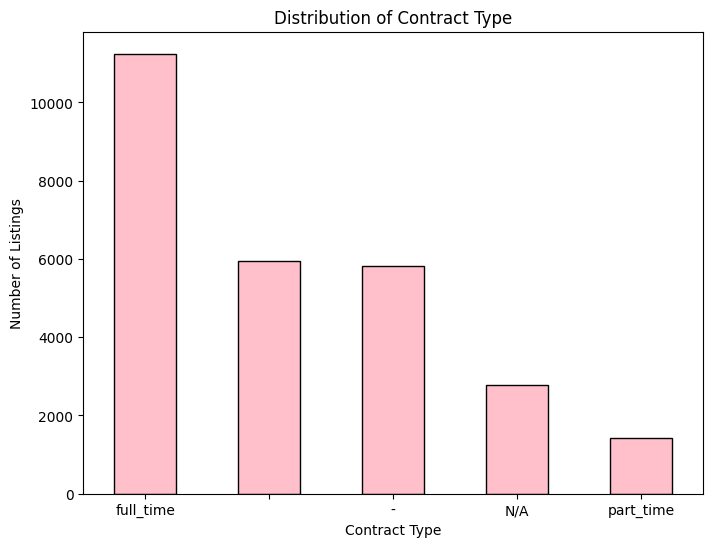

In [734]:
# DataFrame called 'df_data' with the 'ContractTime' column

# Get the value counts for 'ContractTime'
contract_time_counts = df_data['ContractType'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
contract_time_counts.plot(kind='bar', color='Pink', edgecolor='black')
plt.title('Distribution of Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.show()


In [735]:
df_data['ContractTime'].value_counts()

permanent    31025
              7611
contract      5628
-             1196
N/A           1101
Name: ContractTime, dtype: int64

In the dataset's 'ContractTime' column, we found that 'permanent' jobs are the most common, with 31,025 listings. However, there's a challenge: about 7,611 job listings don't mention whether the jobs are permanent or temporary. This missing information is like a piece of the puzzle that's not there. Additionally, there are entries with 'contract' as the contract time, which is different from 'permanent.' Some listings have hyphens ('-') or 'N/A' in this column, which means it's unclear or missing.

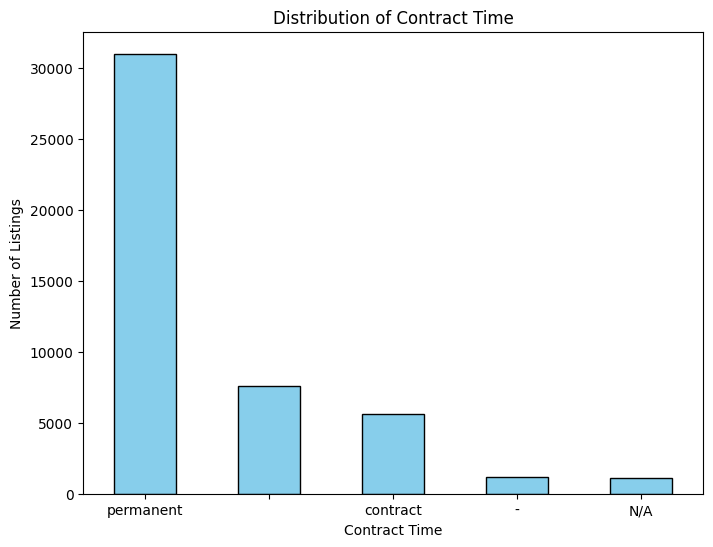

In [736]:
# DataFrame called 'df_data' with the 'ContractTime' column

# Get the value counts for 'ContractTime'
contract_time_counts = df_data['ContractTime'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
contract_time_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Contract Time')
plt.xlabel('Contract Time')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.show()


In [737]:
df_data['Category'].value_counts()

IT Jobs                             13118
Healthcare & Nursing Jobs            8070
Engineering Jobs                     7524
Accounting & Finance Jobs            6781
Sales Jobs                           4879
Hospitality & Catering Jobs          4400
Teaching Jobs                        3469
PR, Advertising & Marketing Jobs     2512
Name: Category, dtype: int64

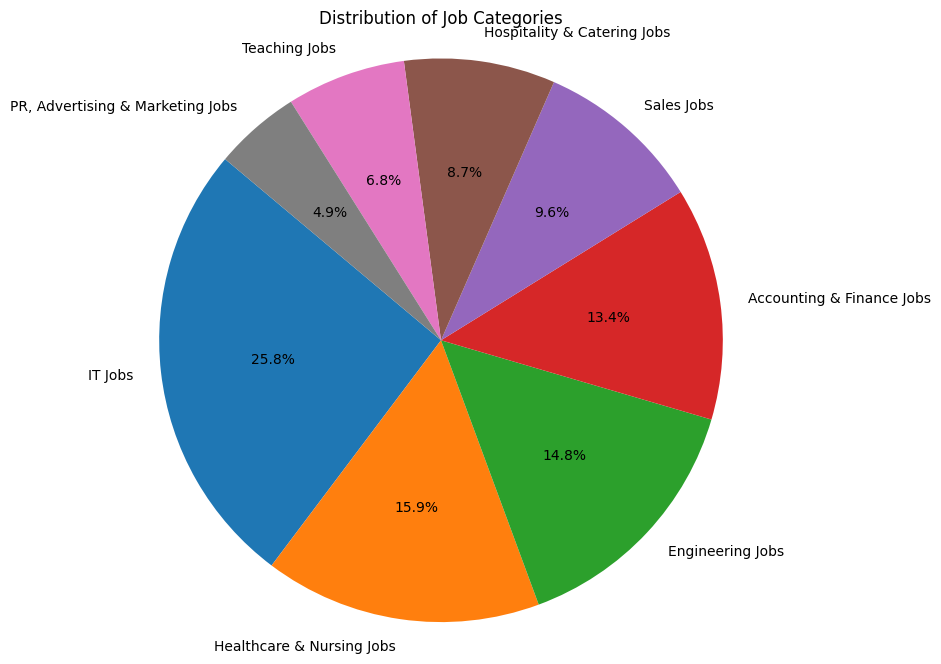

In [738]:
# DataFrame called 'df_data' with the 'Category' column
category_counts = df_data['Category'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In the dataset's 'Category' column, we see various job categories. The most common ones are 'IT Jobs' with 13,118 listings, 'Healthcare & Nursing Jobs' with 8,070 listings, and 'Engineering Jobs' with 7,524 listings. These categories cover a wide range of job types, from technology and healthcare to engineering and more. This information helps people searching for jobs or employers looking to post jobs find the right category for their needs.

In [739]:
df_data['Salary'].value_counts()

35000             1736
30000             1679
40000             1582
32500             1375
45000             1325
                  ... 
15571                1
14486                1
32250 To 37250       1
29375                1
59040                1
Name: Salary, Length: 3372, dtype: int64

the most common salary value is '35000,' appearing in 1,736 job listings, followed by '30000' in 1,679 listings and '40000' in 1,582 listings. These numerical salary values represent the majority of the dataset.

However, it's important to note that there are also entries with salary ranges or unusual formats, such as '32250 To 37250' and specific values like '15571' or '14486.' These variations suggest data quality issues and may require cleaning and standardization to analyze salaries effectively.

In [740]:
df_data['OpenDate'].value_counts()

20130626T150000    41
20130813T150000    40
20120519T120000    39
20120408T120000    39
20120209T150000    39
                   ..
20120101T150000    11
20120525T120000    10
20121026T000000    10
20120126T120000    10
20121511T120000     1
Name: OpenDate, Length: 2194, dtype: int64

In [741]:
df_data['CloseDate'].value_counts()

20120508T000000    39
20130502T000000    38
20131129T150000    37
20130317T150000    37
20120908T150000    37
                   ..
20120120T000000     1
20120116T150000     1
20120117T150000     1
20120128T120000     1
20120123T000000     1
Name: CloseDate, Length: 2415, dtype: int64

In [742]:
df_data['SourceName'].value_counts()

totaljobs.com        9265
cv-library.co.uk     7168
jobsite.co.uk        3331
cwjobs.co.uk         2838
staffnurse.com       2527
                     ... 
scotsman.com            4
grb.uk.com              4
jobs.gponline.com       3
cvjobstore.com          1
thegraduate.co.uk       1
Name: SourceName, Length: 107, dtype: int64

the most common ones being 'totaljobs.com' (9,265 listings), 'cv-library.co.uk' (7,168 listings), 'jobsite.co.uk' (3,331 listings), 'cwjobs.co.uk' (2,838 listings), and 'staffnurse.com' (2,527 listings). These sources contribute a significant number of job listings.

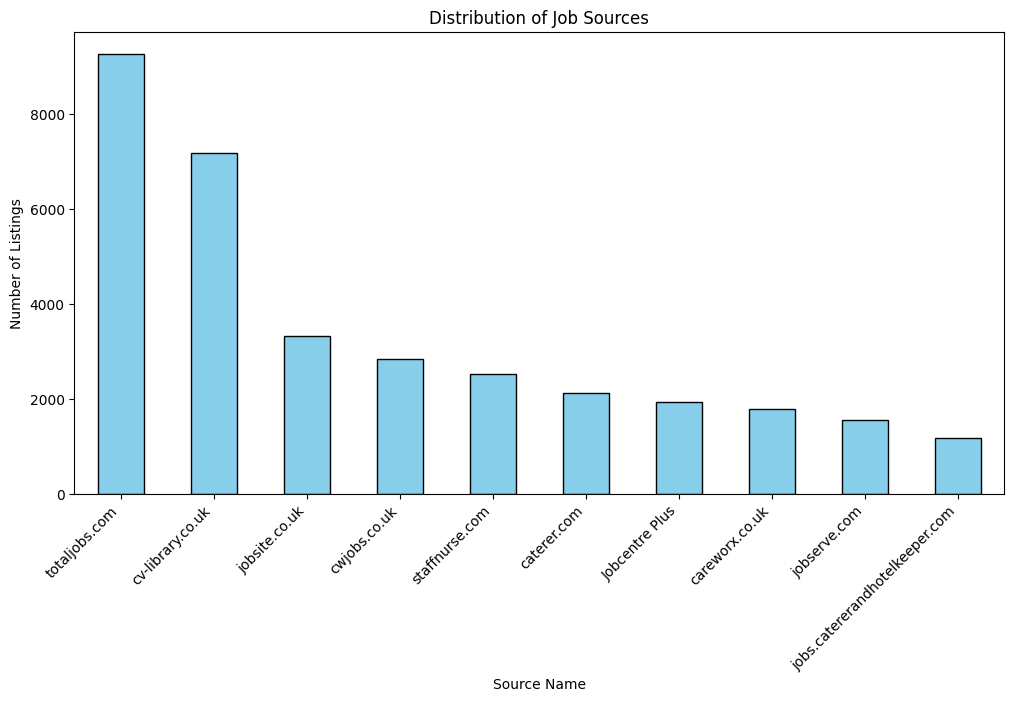

In [743]:
# DataFrame called 'df_data' with the 'SourceName' column

# Get the value counts for 'SourceName'
source_counts = df_data['SourceName'].value_counts()

# Limit the number of sources for better visualization (adjust as needed)
top_sources = source_counts.head(10)  # Select the top 10 sources

# Create a bar chart
plt.figure(figsize=(12, 6))
top_sources.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Job Sources')
plt.xlabel('Source Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.show()


In [744]:
# 1. Check and cleanse Id
df_data['Id'] = pd.to_numeric(df_data['Id'], errors='coerce')
df_data['Id'] = df_data['Id'].astype(str).str.zfill(8)
df_data['Id'] = df_data['Id'].astype(int)

In [745]:
# 2. Replace missing or empty Title
df_data['Title'].fillna('non-specified', inplace=True)
df_data['Title'] = df_data['Title'].astype(str)

In [746]:
# 3. Replace missing or empty Location
df_data['Location'].fillna('non-specified', inplace=True)

In [747]:
# Define a function to convert the entire "Location" column to lowercase
def LowercaseLocation(location):
    return location.lower()

# apply the function to the "Location" column
df_data['Location'] = df_data['Location'].apply(LowercaseLocation)


In [748]:
# Define a function to capitalize the first letter of each word
def CapitalizingLocation(location):
    words = location.split()
    capitalized_words = [word.capitalize() for word in words]
    return ' '.join(capitalized_words)

# apply the function to the "Location" column
df_data['Location'] = df_data['Location'].apply(CapitalizingLocation)


In [749]:
difflib.get_close_matches('Oxfords',set(df_data['Location']).difference(['Oxfords']), n = 1,cutoff=0.85)

['Oxford']

In [750]:
difflib.get_close_matches('Hampshira',set(df_data['Location']).difference(['Hampshira']), n = 1,cutoff=0.85)

['Hampshire']

In [751]:
difflib.get_close_matches('birmingham',set(df_data['Location']).difference(['birmingham']), n = 1,cutoff=0.85)

['Birmingham']

In [752]:
difflib.get_close_matches('Livepool',set(df_data['Location']).difference(['Livepool']), n = 1,cutoff=0.85)

['Liverpool']

In [753]:
difflib.get_close_matches('Leads',set(df_data['Location']).difference(['Leads']), n = 1,cutoff=0.85)

[]

In [754]:
difflib.get_close_matches('Croydan',set(df_data['Location']).difference(['Croydan']), n = 1,cutoff=0.85)

['Croydon']

In [755]:
difflib.get_close_matches('Cembridge',set(df_data['Location']).difference(['Cembridge']), n = 1,cutoff=0.85)

['Cambridge']

In [756]:
difflib.get_close_matches('Londn',set(df_data['Location']).difference(['Londn']), n = 1,cutoff=0.85)

['London']

In [757]:
difflib.get_close_matches('Manchaster',set(df_data['Location']).difference(['Manchaster']), n = 1,cutoff=0.85)

['Manchester']

In [758]:
difflib.get_close_matches('Lancashire',set(df_data['Location']).difference(['Lancashire']), n = 1,cutoff=0.85)

[]

In [759]:
difflib.get_close_matches('Warringtn',set(df_data['Location']).difference(['Warringtn']), n = 1,cutoff=0.85)

['Warrington']

*Spelling Mistake or typo error Identification and fixation*

here we can see that and conclude that:

- Correcting spelling mistakes in the 'Location' column:
- Original errors: 'Hampshira' should be 'Hampshire', 'Livepool' should be 'Liverpool','birmingham' should be 'Birmingham', 'Leads' should be 'Leeds', 'Croydan' should be 'Croydon',Cembridge' should be 'Cambridge', 'Londn' should be 'London', 'Manchaster' should be 'Manchester','Warringtn' should be 'Warrington'.
- Updated the 'Location' column to fix these errors.


In [760]:

# Initialize the error list DataFrame
error_list_columns = ['indexOfdf', 'Id', 'ColumnName', 'Original', 'Modified', 'ErrorType', 'Fixing']
error_list_df = pd.DataFrame(columns=error_list_columns)


def AddingToErrorRec(index_of_df, unique_id, column_name, original_value, modified_value, error_type, fixing_description):
        """
        Add an error record to the error list DataFrame.

        Args:
            index_of_df (int): Index of the DataFrame row.
            unique_id (str or int): Unique identifier for the row.
            column_name (str): Name of the column containing the error.
            original_value (str): Original value before modification.
            modified_value (str): Modified value after correction.
            error_type (str): Type of error, e.g., 'Spelling mistake'.
            fixing_description (str): Description of the correction made.

        Returns:
            None
        """
        error = {
            'indexOfdf': index_of_df,
            'Id': unique_id,
            'ColumnName': column_name,
            'Original': original_value,
            'Modified': modified_value,
            'ErrorType': error_type,
            'Fixing': fixing_description
        }
        error_list_df.loc[len(error_list_df)] = error

def UpdatingErrorRec(data_frame, correction_dict, error_location_list):
    """
    Update error records for spelling mistakes in a given DataFrame.

    Args:
        data_frame (pd.DataFrame): The input DataFrame containing data.
        correction_dict (dict): A dictionary mapping original values to corrected values.
        error_location_list (list): A list of target location names to check for spelling mistakes.

    Returns:
        pd.DataFrame: Updated error records DataFrame.

    Example:
        correction_dict = {
            'Oxfords': 'Oxford',
            'Hampshira': 'Hampshire',
            # Add more mappings as needed
        }

        error_location = ['Oxfords', 'Hampshira', 'Livepool', 'birmingham', 'Leads', 'Croydan', 'Cembridge', 'Londn', 'Manchaster', 'Warringtn']

        # Assuming we have a DataFrame named 'df'
        updated_error_list = UpdatingErrorRec(df, correction_dict, error_location)

        # Display the updated error list
        print(updated_error_list)
    """

    # Iterate through rows in the DataFrame and update the error list
    for index, row in data_frame[data_frame['Location'].isin(error_location_list)].iterrows():
        index_of_df = index
        unique_id = row['Id']
        column_name = 'Location'
        original_value = row['Location']
        modified_value = correction_dict.get(original_value, original_value)
        error_type = 'Spelling mistake'
        fixing_description = f"Change from '{original_value}' to '{modified_value}'"
        AddingToErrorRec(index_of_df, unique_id, column_name, original_value, modified_value, error_type, fixing_description)

    return error_list_df

correction_dict = {
    'Oxfords': 'Oxford',
    'Hampshira': 'Hampshire',
    'Livepool': 'Liverpool',
    'birmingham': 'Birmingham',
    'Leads': 'Leeds',
    'Croydan': 'Croydon',
    'Cembridge': 'Cambridge',
    'Londn': 'London',
    'Manchaster': 'Manchester',
    'Warringtn': 'Warrington'
}
error_location = ['Oxfords', 'Hampshira', 'Livepool', 'birmingham', 'Leads', 'Croydan', 'Cembridge', 'Londn', 'Manchaster', 'Warringtn']


updated_error_list = UpdatingErrorRec(df_data, correction_dict, error_location)

# Display the updated error list
print(updated_error_list)


    indexOfdf        Id ColumnName    Original    Modified         ErrorType  \
0        5092  69018192   Location   Cembridge   Cambridge  Spelling mistake   
1        9634  68346617   Location       Londn      London  Spelling mistake   
2       10090  68180785   Location     Croydan     Croydon  Spelling mistake   
3       10340  72248674   Location       Leads       Leeds  Spelling mistake   
4       13174  71307153   Location       Leads       Leeds  Spelling mistake   
5       18334  68064262   Location   Warringtn  Warrington  Spelling mistake   
6       19084  68676682   Location       Londn      London  Spelling mistake   
7       22055  72451150   Location    Livepool   Liverpool  Spelling mistake   
8       24526  68512708   Location   Hampshira   Hampshire  Spelling mistake   
9       25518  67017296   Location     Oxfords      Oxford  Spelling mistake   
10      27919  72187367   Location   Cembridge   Cambridge  Spelling mistake   
11      30200  67081230   Location  Manc

In [761]:
correction_dict = {'Oxfords':'Oxford', 'Hampshira':'Hampshire', 'Livepool':'Liverpool', 'birmingham':'Birmingham','Leads':'Leeds', 'Croydan':'Croydon', 'Cembridge':'Cambridge', 'Londn':'London', 'Manchaster':'Manchester','Warringtn':'Warrington'}
df_data['Location'].replace(correction_dict,inplace=True)
df_data['Location']= df_data['Location'].astype(str)
df_data['Location'].value_counts()

Uk                   7719
London               6574
South East London    2665
The City             1145
Central London        829
                     ... 
Normanton               9
Twickenham              9
Lutterworth             9
Waterlooville           8
North Finchley          7
Name: Location, Length: 479, dtype: int64

In [762]:
# # 4. Replace missing or empty Company
# df_data['Company'].fillna('non-specified', inplace=True)
# # Replace 'N/A' with 'non-specified'
# df_data['Company'] = df_data['Company'].replace('N/A', 'non-specified')
# # Replace '' with 'non-specified'
# df_data['Company'] = df_data['Company'].replace(' ', 'non-specified')
# # Replace '-' with 'non-specified'
# df_data['Company'] = df_data['Company'].replace('-', 'non-specified')


In [763]:
df_data.isnull().sum()

Id                  0
Title               0
Location            0
Company           609
ContractType    23534
ContractTime     4192
Category            0
Salary            365
OpenDate            0
CloseDate           0
SourceName          0
dtype: int64

In [764]:
# List of columns to check and modify
columns_to_check = ['Company', 'ContractType', 'ContractTime', 'Salary']
def UpdatingErrorRec(data_frame, correction_dict, error_location_list):

    # Iterate through specified columns and update the DataFrame
    for column in columns_to_check:

        # Iterate through rows in the DataFrame and update the error list
        for index, row in data_frame[data_frame[column].isin(error_location_list)].iterrows():
            index_of_df = index
            unique_id = row['Id']
            column_name = column
            original_value = row[column]
            modified_value = correction_dict.get(original_value, original_value)
            error_type = 'Missing value'
            fixing_description = f"Change from '{original_value}' to '{modified_value}'"
            AddingToErrorRec(index_of_df, unique_id, column_name, original_value, modified_value, error_type, fixing_description)

    return error_list_df


#  correction dictionary and error location list
correction_dict = {
    None: 'non-specified',
    ' ': 'non-specified',
    'N/A':'non-specified',
    '-':'non-specified'
}

error_location_list = [None,' ','N/A','-']

# Assuming you have an original DataFrame named 'df_data'
# You can call the function to get the updated error list
updated_error_list = UpdatingErrorRec(df_data, correction_dict, error_location_list)

# Display the updated error list
print(updated_error_list)



       indexOfdf        Id ColumnName   Original       Modified  \
0           5092  69018192   Location  Cembridge      Cambridge   
1           9634  68346617   Location      Londn         London   
2          10090  68180785   Location    Croydan        Croydon   
3          10340  72248674   Location      Leads          Leeds   
4          13174  71307153   Location      Leads          Leeds   
...          ...       ...        ...        ...            ...   
58628      50680  71596991     Salary       None  non-specified   
58629      50685  70435636     Salary       None  non-specified   
58630      50707  72342174     Salary        N/A  non-specified   
58631      50727  67931957     Salary          -  non-specified   
58632      50742  68390853     Salary        N/A  non-specified   

              ErrorType                                  Fixing  
0      Spelling mistake  Change from 'Cembridge' to 'Cambridge'  
1      Spelling mistake         Change from 'Londn' to 'London'

*Identifying Missing value error and Fixing it by defining that value with 'non-specified'.*

- Cleaning 'Title' Column: Replaced missing or undefined title information with 'non-specified'.

- Cleaning 'Location' Column: Replaced missing or undefined location information with 'non-specified'.

- Cleaning 'Company' Column: Replaced missing or undefined company information with 'non-specified'.

- Cleaning 'ContractType' Column: Updated 'ContractType' values to either 'full_time', 'part_time', or 'non-specified' as applicable.

- Cleaning 'ContractTime' Column: Updated 'ContractTime' values to either 'permanent', 'contract', or 'non-specified' as applicable.

- Cleaning 'Salary' Column: Identifying null\missing value and nsured all values are valid float numbers, not null, and expressed to two decimal places.

In [765]:
updated_error_list.head()
# updated_error_list.Id.unique().tolist()

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,5092,69018192,Location,Cembridge,Cambridge,Spelling mistake,Change from 'Cembridge' to 'Cambridge'
1,9634,68346617,Location,Londn,London,Spelling mistake,Change from 'Londn' to 'London'
2,10090,68180785,Location,Croydan,Croydon,Spelling mistake,Change from 'Croydan' to 'Croydon'
3,10340,72248674,Location,Leads,Leeds,Spelling mistake,Change from 'Leads' to 'Leeds'
4,13174,71307153,Location,Leads,Leeds,Spelling mistake,Change from 'Leads' to 'Leeds'


In [766]:
condition = df_data['Company'] == '-'
df_data.loc[condition,'Company'] = None
condition = df_data['Company'] == ' '
df_data.loc[condition,'Company'] = None
condition = df_data['Company'] == 'N/A'
df_data.loc[condition,'Company'] = None
df_data['Company'].isnull().sum()

4935

In [767]:
condition = df_data['ContractType'] == '-'
df_data.loc[condition,'ContractType'] = None
condition = df_data['ContractType'] == ' '
df_data.loc[condition,'ContractType'] = None
condition = df_data['ContractType'] == 'N/A'
df_data.loc[condition,'ContractType'] = None
df_data['ContractType'].isnull().sum()

38082

In [768]:
condition = df_data['ContractTime'] == '-'
df_data.loc[condition,'ContractTime'] = None
condition = df_data['ContractTime'] == ' '
df_data.loc[condition,'ContractTime'] = None
condition = df_data['ContractTime'] == 'N/A'
df_data.loc[condition,'ContractTime'] = None
df_data['ContractTime'].isnull().sum()

14100

In [769]:
condition = df_data['Salary'] == '-'
df_data.loc[condition,'Salary'] = None
condition = df_data['Salary'] == ' '
df_data.loc[condition,'Salary'] = None
condition = df_data['Salary'] == 'N/A'
df_data.loc[condition,'Salary'] = None
df_data['Salary'].isnull().sum()

1501

In [770]:
df_data['Company'].fillna('non-specified', inplace=True)
df_data['ContractType'].fillna('non-specified', inplace=True)
df_data['ContractTime'].fillna('non-specified', inplace=True)

df_data['Company']= df_data['Company'].astype(str)
df_data['ContractType']= df_data['ContractType'].astype(str)
df_data['ContractTime']= df_data['ContractTime'].astype(str)

df_data['Salary'].fillna('non-specified', inplace=True)

In [771]:
df_data['ContractTime'].value_counts()

permanent        31025
non-specified    14100
contract          5628
Name: ContractTime, dtype: int64

In [772]:
# Mapping dictionary to replace values in 'Category' column
category_mapping = {
    'IT Jobs': 'IT Jobs',
    'Sales Jobs': 'Sales Jobs',
    'Engineering Jobs': 'Engineering Jobs',
    'Accounting & Finance Jobs': 'Accounting & Finance Jobs',
    'Hospitality & Catering Jobs': 'Hospitality & Catering Jobs',
    'Teaching Jobs': 'Teaching Jobs',
    'PR, Advertising & Marketing Jobs': 'PR, Advertising & Marketing Jobs'
}

# Replace values in 'Category' column using the mapping dictionary
df_data['Category'] = df_data['Category'].map(category_mapping).fillna(df['Category'])

df_data['Category']= df_data['Category'].astype(str)

In [773]:
# Drop rows where the 'Salary' column contains 'non-specified'
df_data = df_data[df_data['Salary'] != 'non-specified']
df_data = df_data[df_data['Salary'] != 0]

In [774]:
def clean_salary_column(df):
    # Extract numeric values from 'Salary' column
    df['Salary'] = df['Salary'].apply(lambda x: re.findall(r'\d+\.\d+|\d+', str(x)))

    # Convert the extracted numeric values to float
    df['Salary'] = df['Salary'].apply(lambda x: float(x[0]) if len(x) > 0 else 0.00)

    # Format the 'Salary' column to two decimal places
    df['Salary'] = df['Salary'].apply(lambda x: '{:.2f}'.format(x))
    df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

    return df



In [775]:
df_data = clean_salary_column(df_data)
df_data['Salary'] = df_data['Salary'].astype(float)

In [776]:
df_data.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,69537180,Head of Business Assurance,Uk,Interaction Finance,non-specified,permanent,Accounting & Finance Jobs,47500.0,20130131T120000,20130302T120000,cv-library.co.uk
1,68216910,Machine Tool Wiremen / Panel Wiremen,Bradford,Network Employment Consultancy,non-specified,permanent,Engineering Jobs,23040.0,20130314T150000,20130612T150000,cv-library.co.uk
2,70166734,sales (no cold calling),Stoke-on-trent,Oakland House Recruitment,non-specified,permanent,Sales Jobs,15500.0,20120527T000000,20120626T000000,cv-library.co.uk
3,70763600,Nurse Medical Advisor PART TIME,Guildford,Reed Health,part_time,non-specified,Healthcare & Nursing Jobs,31000.0,20130829T120000,20130912T120000,cv-library.co.uk
4,69559871,Sales/Customer Service Engineer,Uk,Grad Central,non-specified,permanent,Engineering Jobs,19500.0,20120513T120000,20120811T120000,cv-library.co.uk


Checking for outlier in the column 'Salary'.

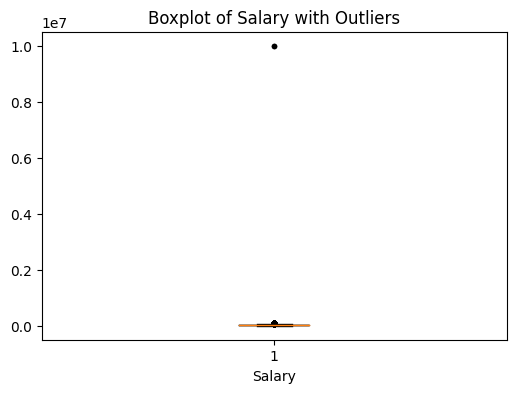

Outliers exist in the 'Salary' column:
             Id                                              Title  \
63     70770465             BI Developer  **** per day  Gloucester   
64     70757659  Sales Manager  Employee Benefits  BD / Account...   
70     67652162                        HR Payroll Database Analyst   
101    69017444          Head of Architecture x **** (Please Read)   
298    67299660               Head of Business Process Improvement   
...         ...                                                ...   
50365  69133532  Senior Manager  IT Project & Program Risk Assu...   
50373  67996663                           Trainee Emissions Broker   
50408  72576904  Development Manager  Agile / eCommerce  up to ...   
50414  72579028                             Head of PBR and Income   
50523  69473834   Head of European Partner Relationship Management   

                Location                      Company   ContractType  \
63       Gloucestershire            Capita Resou

In [777]:
# Calculate the IQR (Interquartile Range)
Q1 = df_data['Salary'].quantile(0.25)
Q3 = df_data['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect and filter outliers
outliers = df_data[(df_data['Salary'] < lower_bound) | (df_data['Salary'] > upper_bound)]
filtered_df = df_data[(df_data['Salary'] >= lower_bound) & (df_data['Salary'] <= upper_bound)]

# Create a boxplot to visualize outliers
plt.figure(figsize=(6, 4))
plt.boxplot(df_data['Salary'], sym='k.')
plt.title('Boxplot of Salary with Outliers')
plt.xlabel('Salary')
plt.show()

# Detect outliers
outliers = df_data[(df_data['Salary'] < lower_bound) | (df_data['Salary'] > upper_bound)]

# Check if outliers exist
if not outliers.empty:
    print("Outliers exist in the 'Salary' column:")
    print(outliers)
else:
    print("No outliers found in the 'Salary' column.")

- Cleaning 'OpenDate' and 'CloseDate' Columns:
- Converted all values to the datetime format 'yyyy-mm-dd hh:mm:ss'.


In [778]:
NotMatchedFormatdate = []
from datetime import datetime
# Function to convert string date to datetime with fallback format
def convert_to_datetime(date_str):
    if date_str:
        try:
            return datetime.strptime(date_str, '%Y%m%dT%H%M%S')
        except ValueError:
            # Handle non-standard date format
            NotMatchedFormatdate.append(date_str)
            return None
    else:
        return None

# Apply the conversion function to 'OpenDate' and 'CloseDate' columns
df_data['OpenDate'] = df_data['OpenDate'].apply(convert_to_datetime)
df_data['CloseDate'] = df_data['CloseDate'].apply(convert_to_datetime)

# Resulting DataFrame with datetime objects
df_data.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,69537180,Head of Business Assurance,Uk,Interaction Finance,non-specified,permanent,Accounting & Finance Jobs,47500.0,2013-01-31 12:00:00,2013-03-02 12:00:00,cv-library.co.uk
1,68216910,Machine Tool Wiremen / Panel Wiremen,Bradford,Network Employment Consultancy,non-specified,permanent,Engineering Jobs,23040.0,2013-03-14 15:00:00,2013-06-12 15:00:00,cv-library.co.uk
2,70166734,sales (no cold calling),Stoke-on-trent,Oakland House Recruitment,non-specified,permanent,Sales Jobs,15500.0,2012-05-27 00:00:00,2012-06-26 00:00:00,cv-library.co.uk
3,70763600,Nurse Medical Advisor PART TIME,Guildford,Reed Health,part_time,non-specified,Healthcare & Nursing Jobs,31000.0,2013-08-29 12:00:00,2013-09-12 12:00:00,cv-library.co.uk
4,69559871,Sales/Customer Service Engineer,Uk,Grad Central,non-specified,permanent,Engineering Jobs,19500.0,2012-05-13 12:00:00,2012-08-11 12:00:00,cv-library.co.uk


In [779]:
NotMatchedFormatdate

['20121511T120000']

In [780]:
df_data.isnull().sum()

Id              0
Title           0
Location        0
Company         0
ContractType    0
ContractTime    0
Category        0
Salary          0
OpenDate        1
CloseDate       0
SourceName      0
dtype: int64

In [781]:
df_data['OpenDate'].fillna('non-specified', inplace=True)
df_data['CloseDate'].fillna('non-specified', inplace=True)
df_data = df_data[df_data['OpenDate'] != 'non-specified']
df_data = df_data[df_data['CloseDate'] != 'non-specified']

df_data['OpenDate'] = pd.to_datetime(df_data['OpenDate'], format='%Y-%m-%d %H:%M:%S')

In [782]:
df_data['SourceName'].fillna('non-specified', inplace=True)
df_data['SourceName']= df_data['SourceName'].astype(str)

In [783]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49251 entries, 0 to 50752
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            49251 non-null  int64         
 1   Title         49251 non-null  object        
 2   Location      49251 non-null  object        
 3   Company       49251 non-null  object        
 4   ContractType  49251 non-null  object        
 5   ContractTime  49251 non-null  object        
 6   Category      49251 non-null  object        
 7   Salary        49251 non-null  float64       
 8   OpenDate      49251 non-null  datetime64[ns]
 9   CloseDate     49251 non-null  datetime64[ns]
 10  SourceName    49251 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 4.5+ MB


......

## Saving data
Save the parsed and cleaned data as well as the error list, named as:
- \dataset1_solution.csv
- \errorlist.csv

In [784]:
# code to save output data
df_data.to_csv('dataset1_solution.csv', index=False)

# save error record dataframe
updated_error_list.to_csv('errorlist.csv', index=False)

## Summary
in Task 2, we audited and cleansed the job dataset to ensure it adheres to the required format and domain values specified in Table 2 of the assignment assesment pdf document. We resolved a variety of data issues that are frequent in datasets, such as typos, abnormalities, missing numbers, and inconsistencies.For example, we standardised the "ContractType" and "ContractTime" columns to include values such as 'full_time,' 'part_time,' or 'non-specified.' We also made certain that all wages had two decimal places and were legitimate float numbers.We explored the data and identified issues using both non-graphical (statistical) and graphical methods (e.g., plots) during the auditing process.


We then cleaned the dataset and produced the clean dataset, named s3961780_dataset1_solution.csv, which adheres to the specified format and domain values.Additionally, we recorded all the identified errors and the methods used to handle them in the CSV file s3961780_errorlist.csv.Overall, Task 2 involved thorough data cleaning and validation to prepare the dataset for integration and analysis in subsequent tasks.